In [17]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5
from scipy.fft import fft, fftfreq, fftshift, rfft, rfftfreq
from scipy import signal


In [18]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

def plot_spectrum_stem(sig, sample_rate, lower=0, upper=None):
    yf = rfft(sig)
    xf = rfftfreq(len(sig), 1 / sample_rate)
    if upper is None:
        upper = len(xf)

    plt.stem(xf[lower:upper], np.abs(yf)[lower:upper])
    plt.xlabel('Freq, Hz')
    plt.ylabel('Values')
    plt.show()


In [19]:
def plot_sig(timestamps, sig, title="", x="time, s", y="signal"):
    plt.plot(timestamps, sig)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [20]:
# noise function
def generate_noise(power, num_samples):
    return np.random.uniform(-power, power, num_samples)


In [21]:
# filters:
def makebutter_filter(fcut, fs, order=5, btype='band'):
    nyq = 0.5 * fs
    f = fcut / nyq
    b, a = signal.butter(order, f, btype=btype)
    return b, a

### Task 1

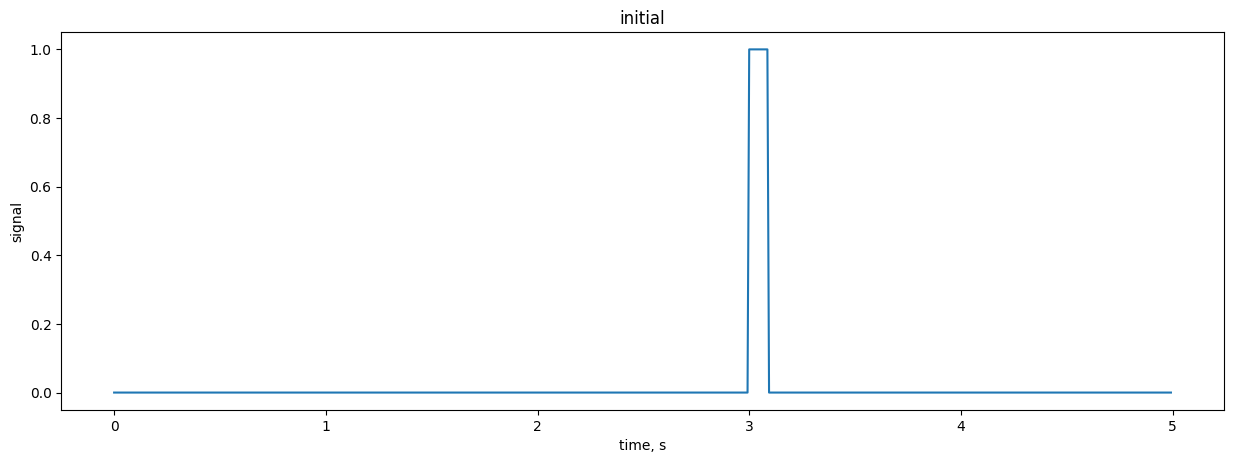

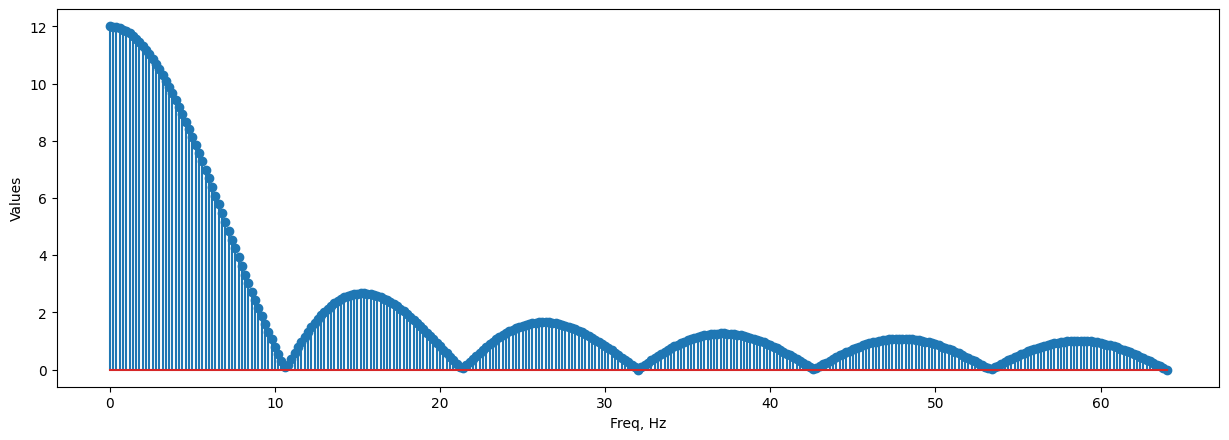

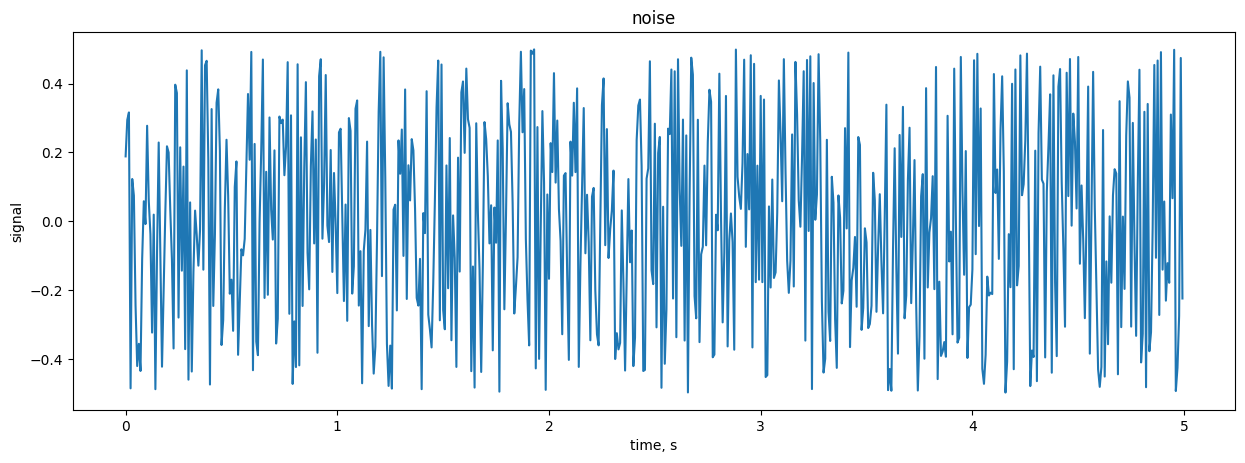

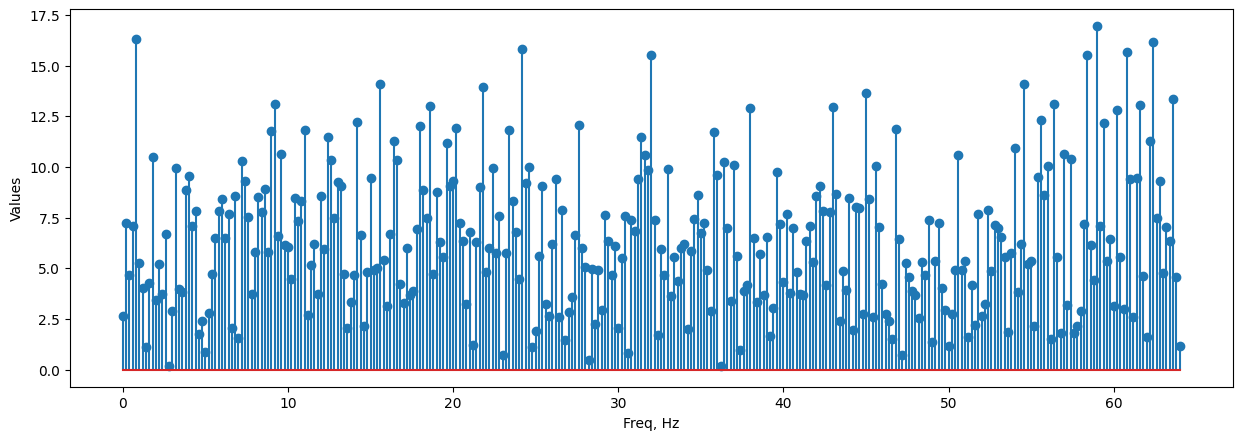

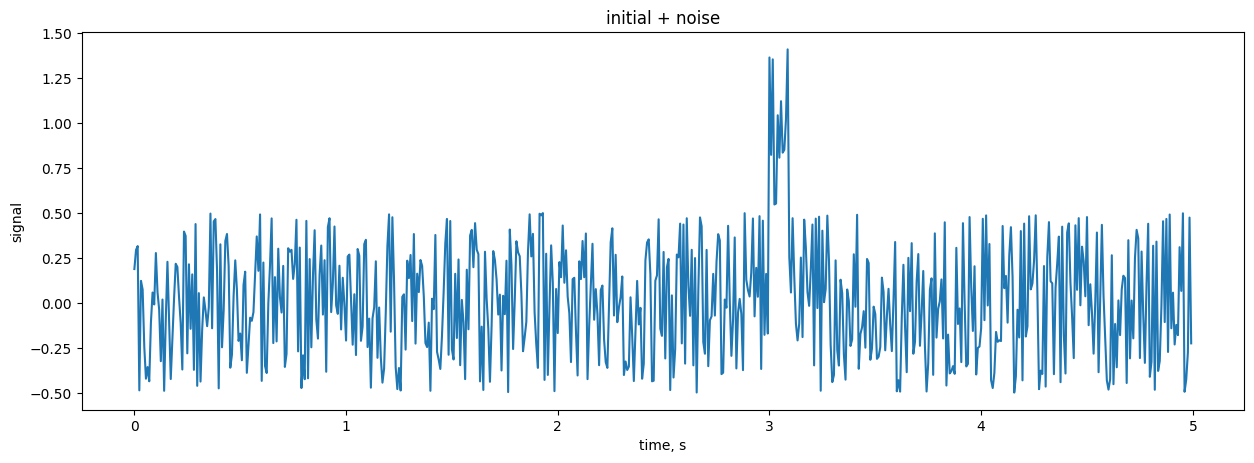

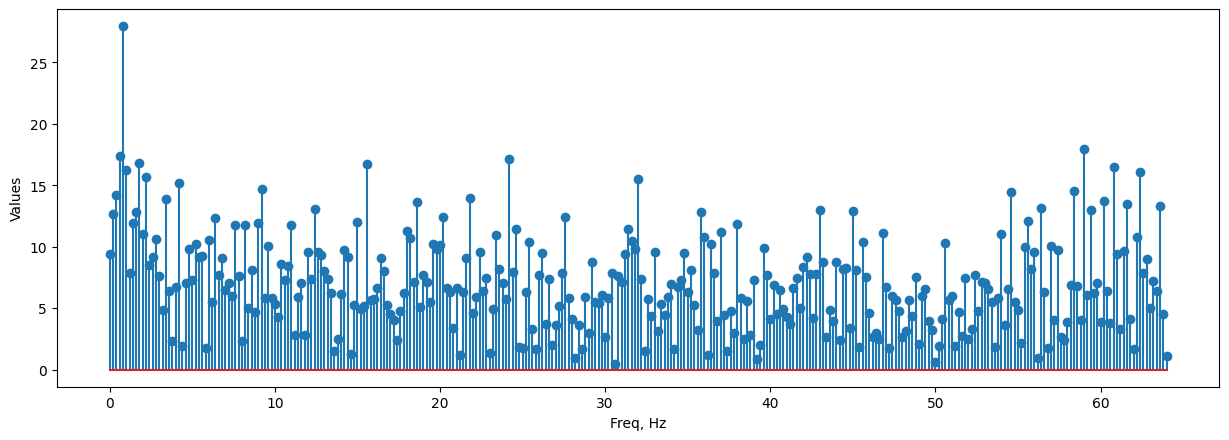

In [22]:
sample_rate = 128
timestamps, _ = generate_sine_wave(1, 128, 5)

sig_rect = np.zeros(len(timestamps))
sig_rect[128*3: int(128*3+128*0.1)] += 1

noise = generate_noise(0.5, len(sig_rect))
sig_noise = sig_rect + noise
plot_sig(timestamps, sig_rect, title="initial")
plot_spectrum_stem(sig_rect, sample_rate)

plot_sig(timestamps, noise, title="noise")
plot_spectrum_stem(noise, sample_rate)

plot_sig(timestamps, sig_noise, title="initial + noise")
plot_spectrum_stem(sig_noise, sample_rate)


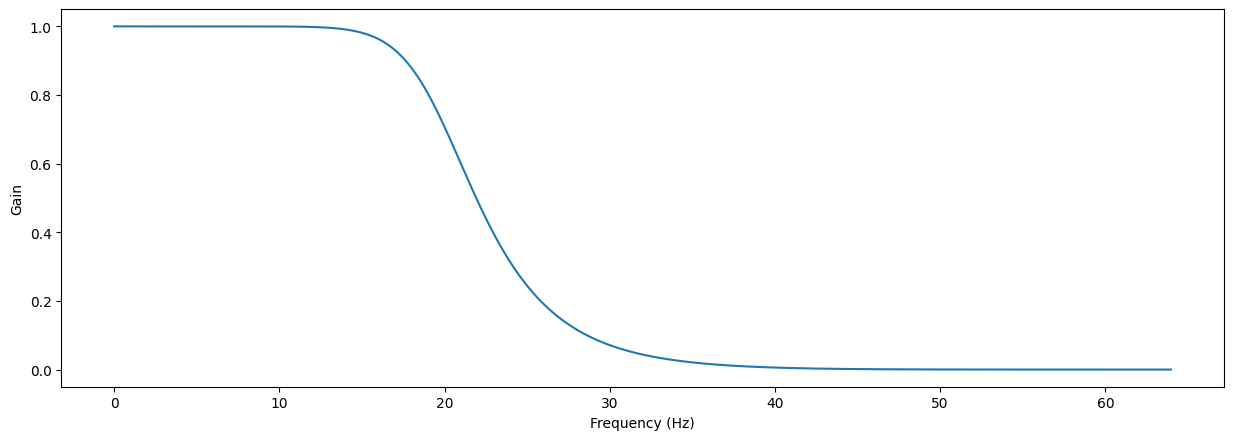

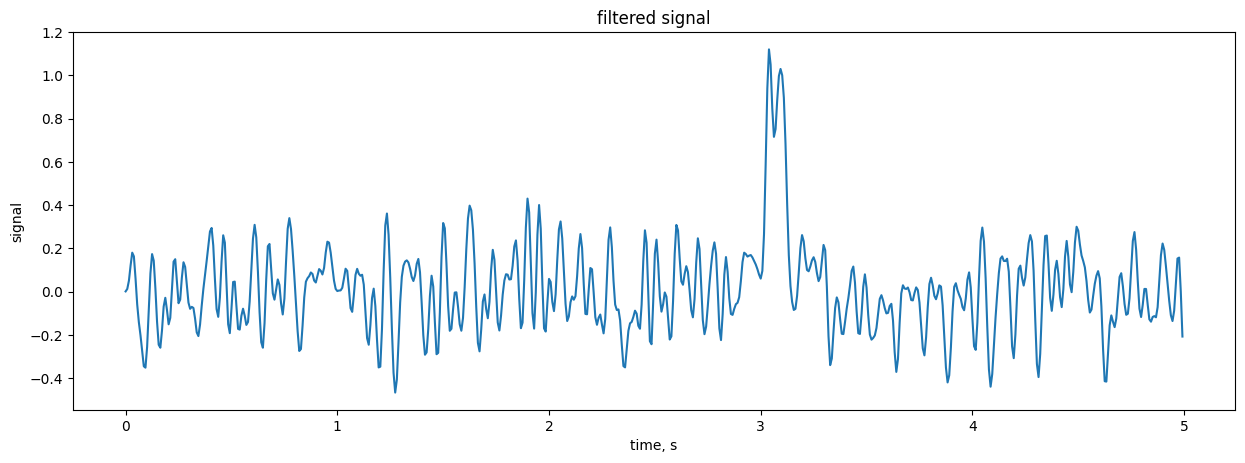

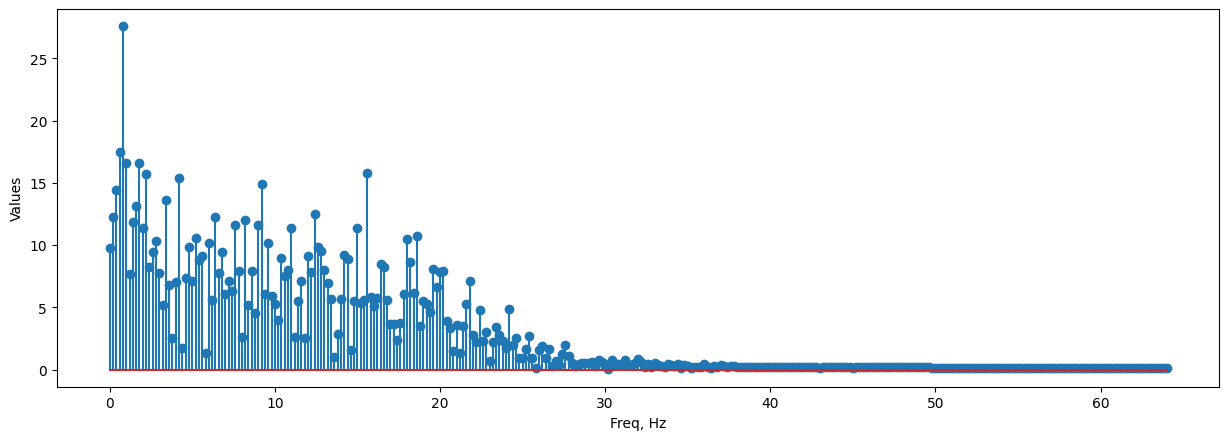

In [23]:
def plot_filter(b, a, SAMPLE_RATE):
    w, h = signal.freqz(b, a, worN=2000)  # frequency responce
    plt.plot((SAMPLE_RATE * 0.5 / np.pi) * w, abs(h))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    # plt.grid(True)
    plt.show()

order = 5
f = 20 / (sample_rate / 2)
b, a = signal.butter(order, f, 'lp')
plot_filter(b, a, sample_rate)

filtered = signal.lfilter(b, a, sig_noise)
plot_sig(timestamps, filtered, title=f"filtered signal")
plot_spectrum_stem(filtered, sample_rate)

### Task 2


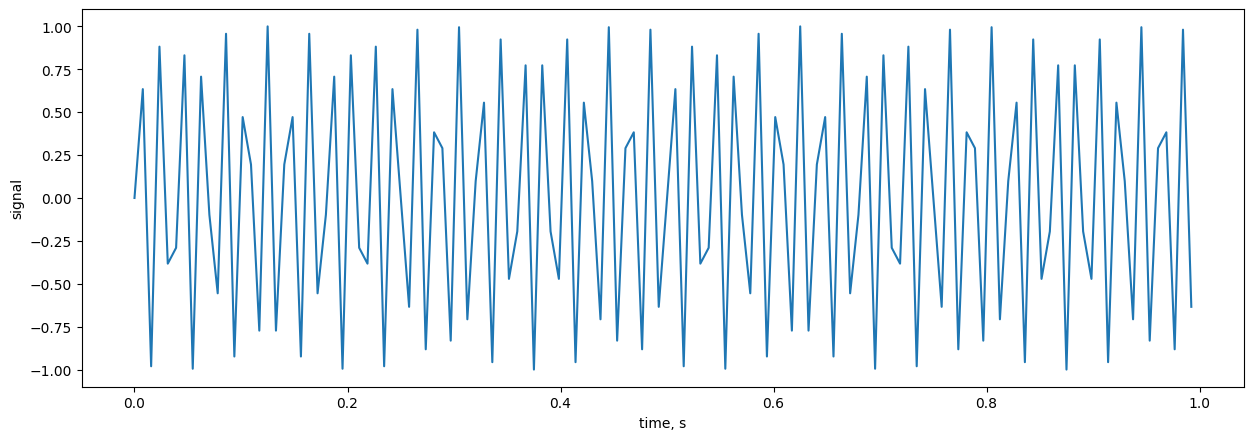

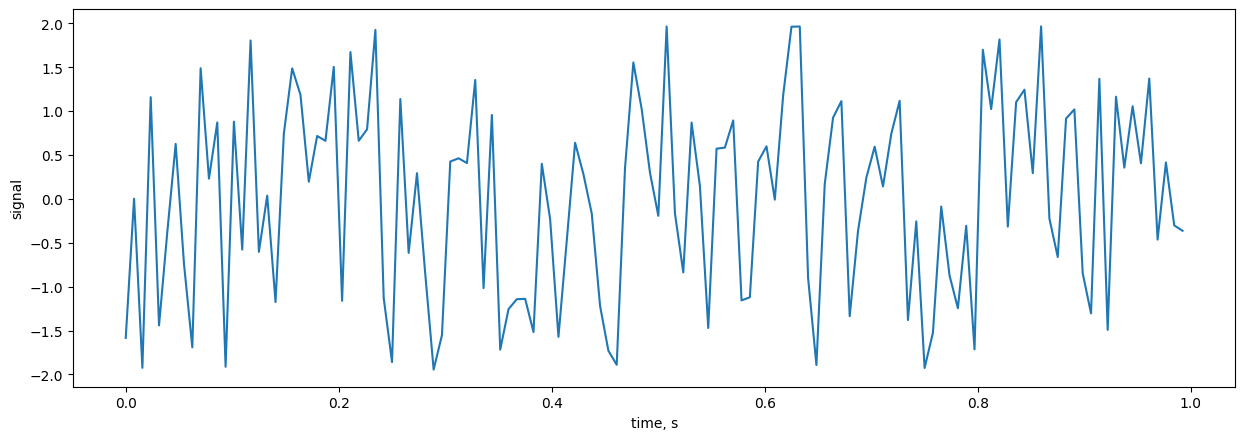

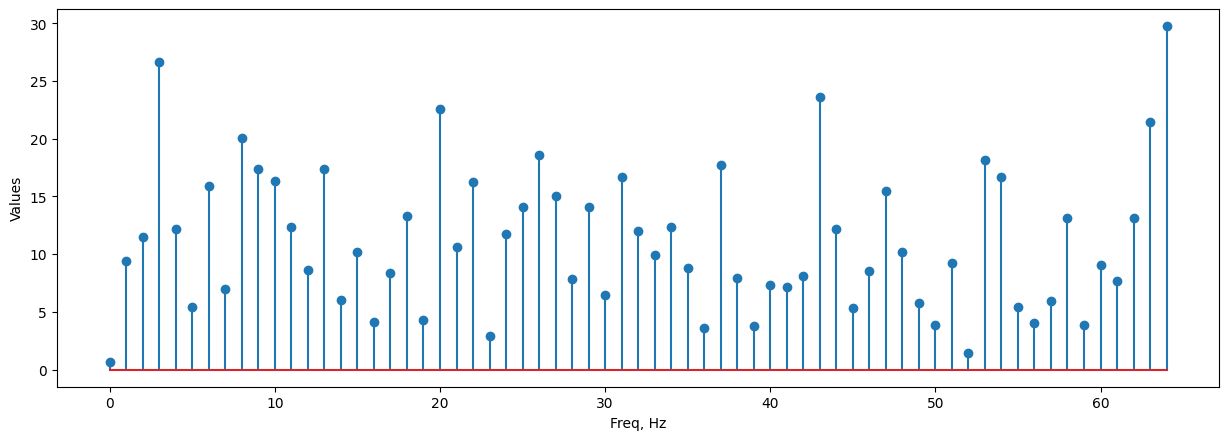

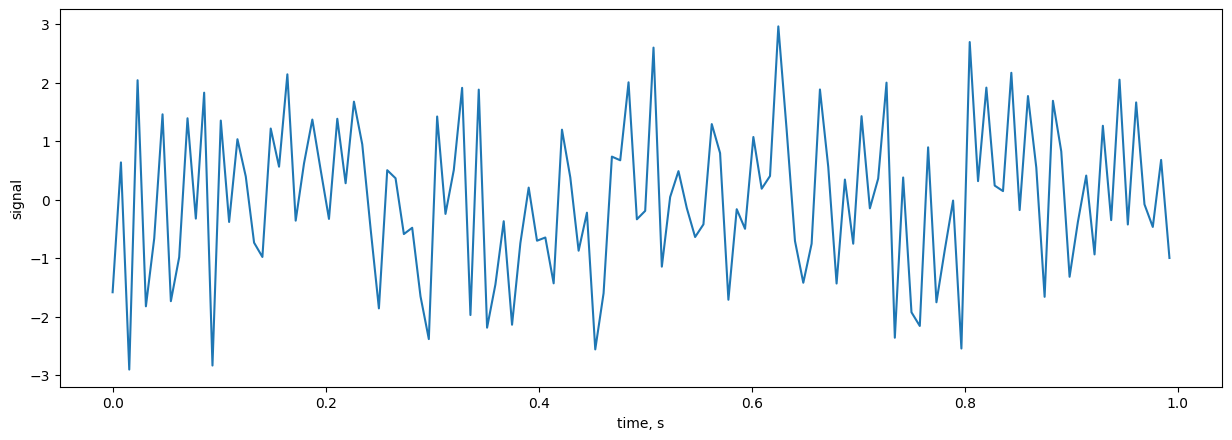

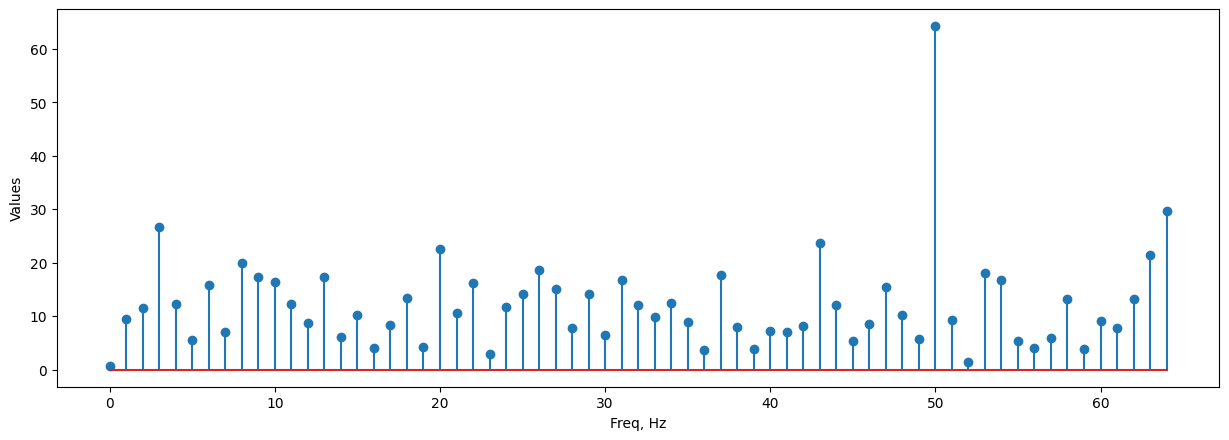

In [8]:
sample_rate = 128
timestamps, sin_10Hz = generate_sine_wave(50, 128, 1)
noise = generate_noise(2, len(sin_10Hz))
sin_noise = sin_10Hz + noise

plot_sig(timestamps, sin_10Hz)
plot_sig(timestamps, noise)
plot_spectrum_stem(noise, sample_rate)

plot_sig(timestamps, sin_noise)
plot_spectrum_stem(sin_noise, sample_rate)

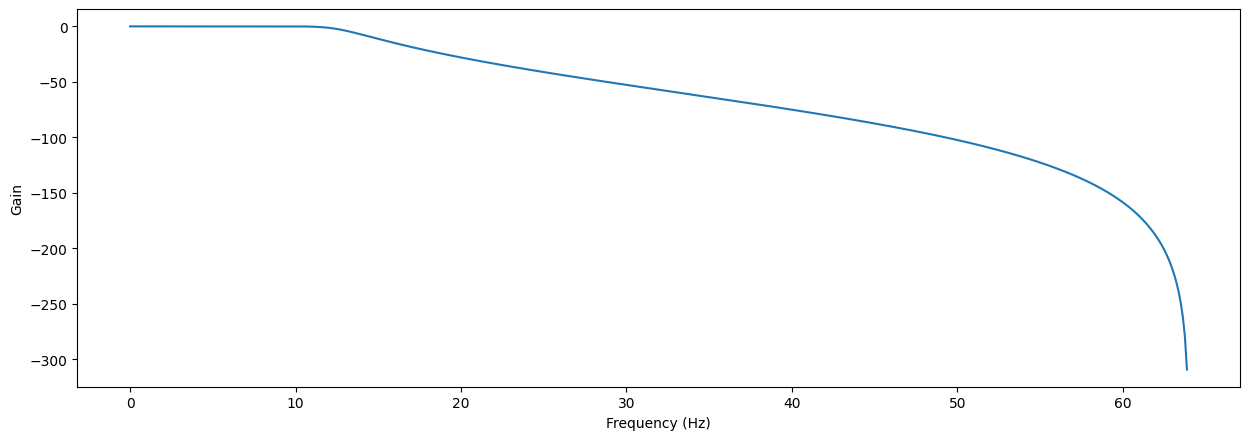

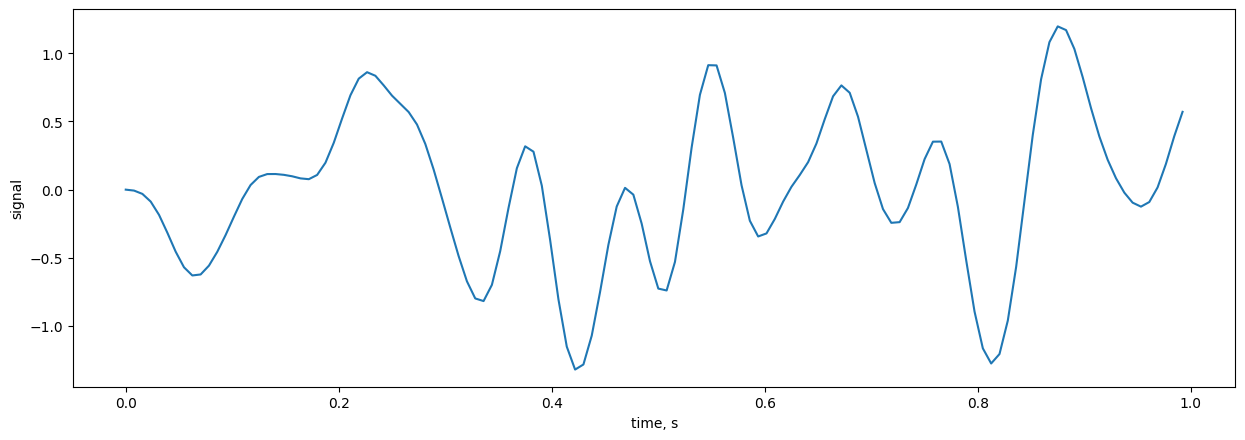

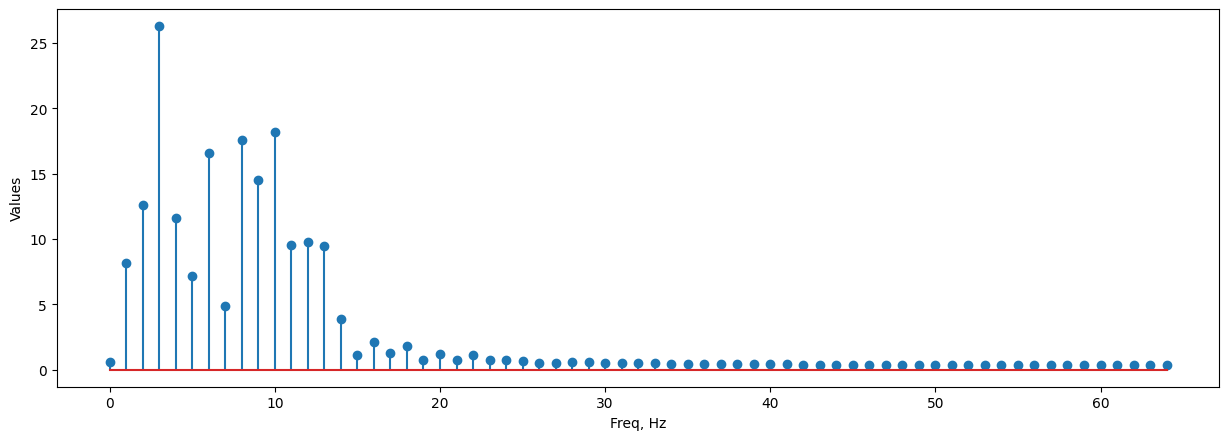

In [9]:
# Фільтр низьких частот
Apass = 0.01  # dB
wn = 10 / (sample_rate / 2)
b, a = signal.cheby1(order, Apass, wn, btype='lp')

filtered = signal.lfilter(b, a, sin_noise)

w, h = signal.freqz(b, a)
plt.plot(0.5*sample_rate*w/np.pi, 20*np.log10(np.abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.show()
plot_sig(timestamps, filtered)
plot_spectrum_stem(filtered, sample_rate)

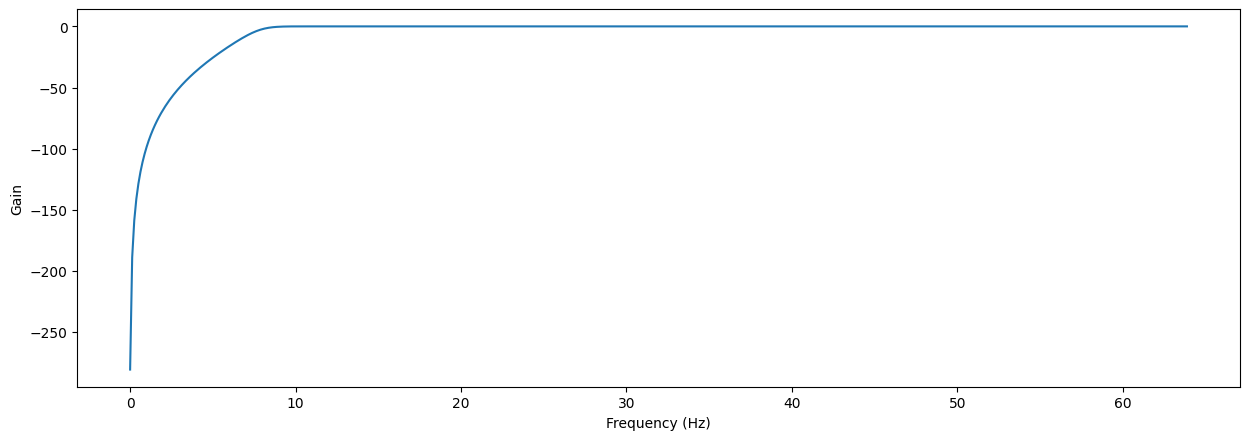

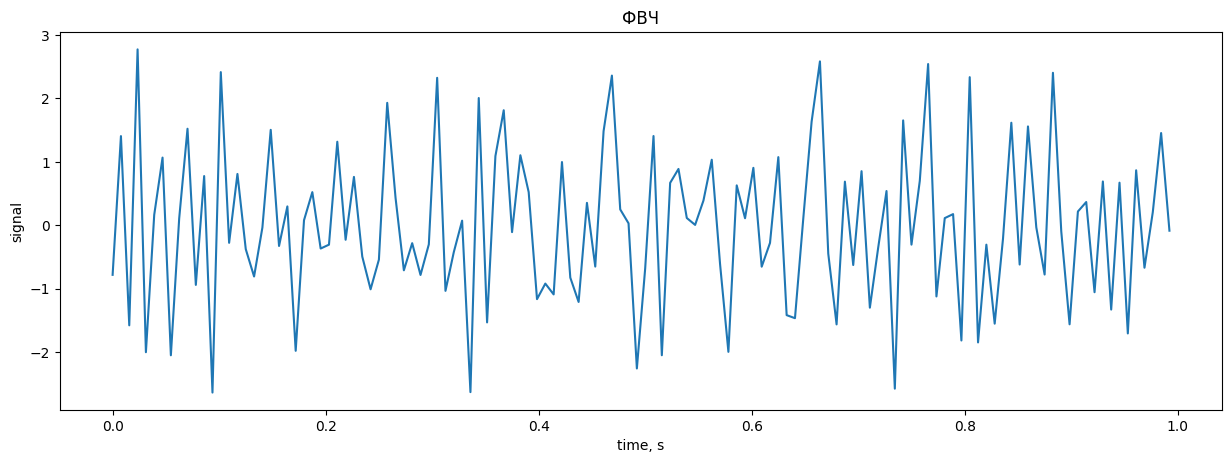

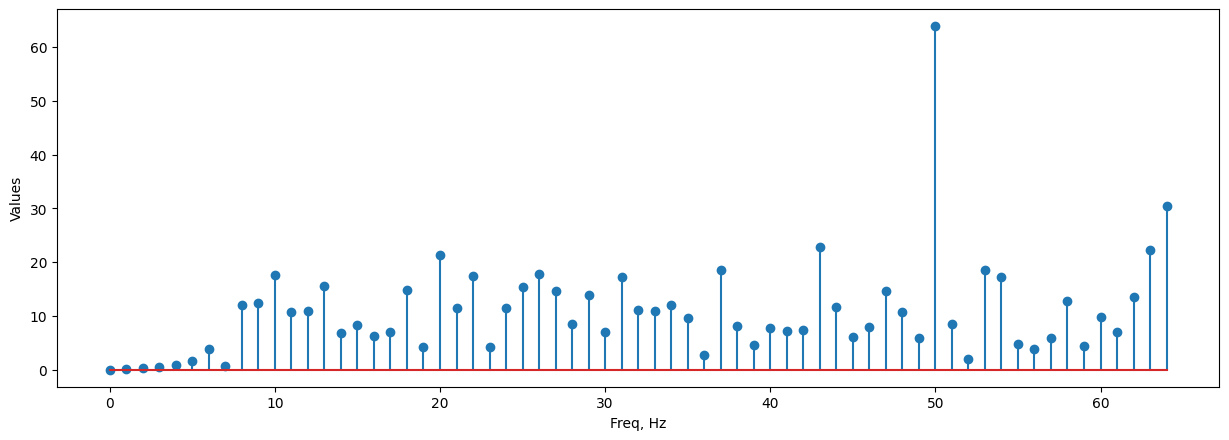

In [10]:
# Фільтр високих частот
b, a = signal.cheby1(order, Apass, wn, btype='hp')

filtered = signal.lfilter(b, a, sin_noise)

w, h = signal.freqz(b, a)
plt.plot(0.5*sample_rate*w/np.pi, 20*np.log10(np.abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.show()
plot_sig(timestamps, filtered, title="ФВЧ")
plot_spectrum_stem(filtered, sample_rate)

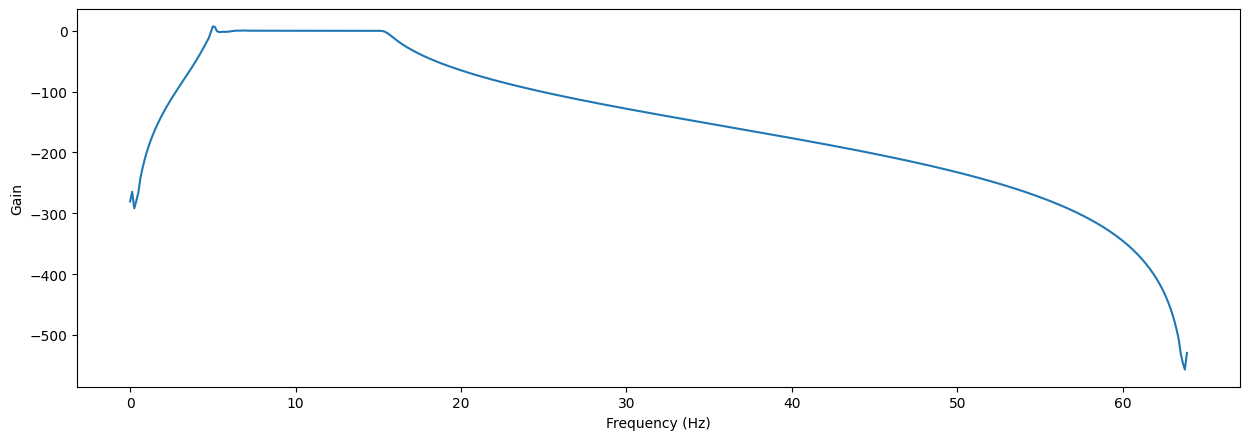

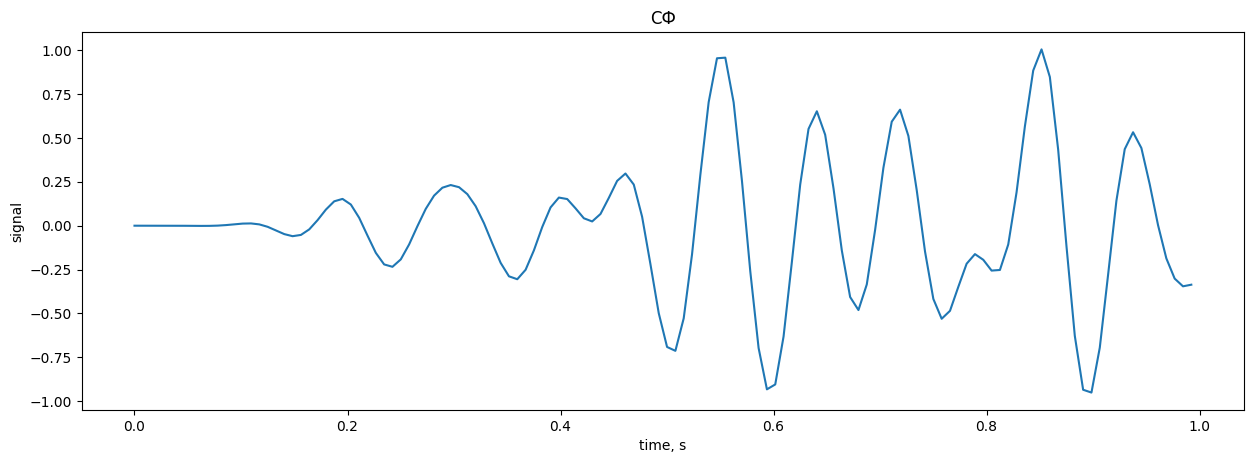

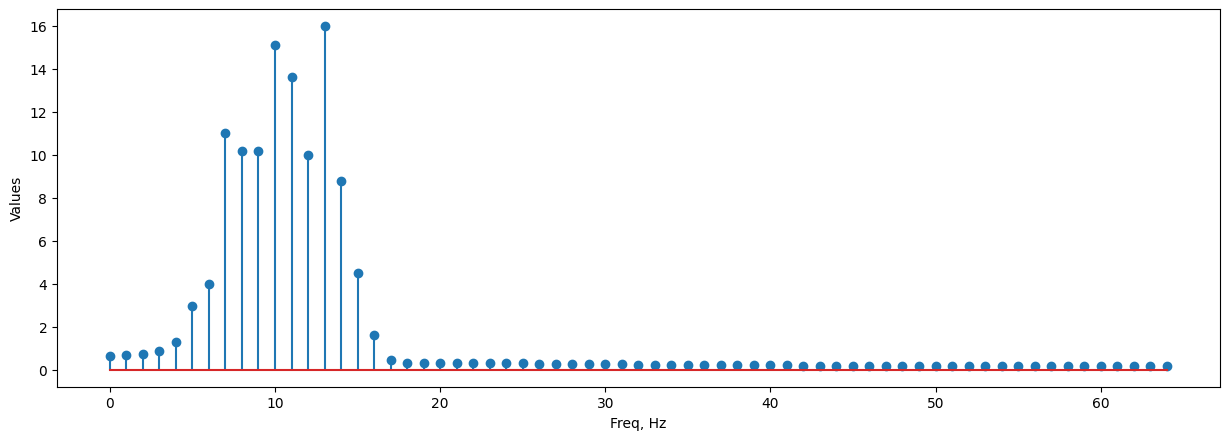

In [11]:
low = 5 / (0.5 * sample_rate)
high = 15 / (0.5 * sample_rate)
b, a = signal.cheby1(10, Apass, [low, high], btype='band')

filtered = signal.lfilter(b, a, sin_noise)

w, h = signal.freqz(b, a)
plt.plot(0.5*sample_rate*w/np.pi, 20*np.log10(np.abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.show()

plot_sig(timestamps, filtered, title="СФ")
plot_spectrum_stem(filtered, sample_rate)



### Task 3

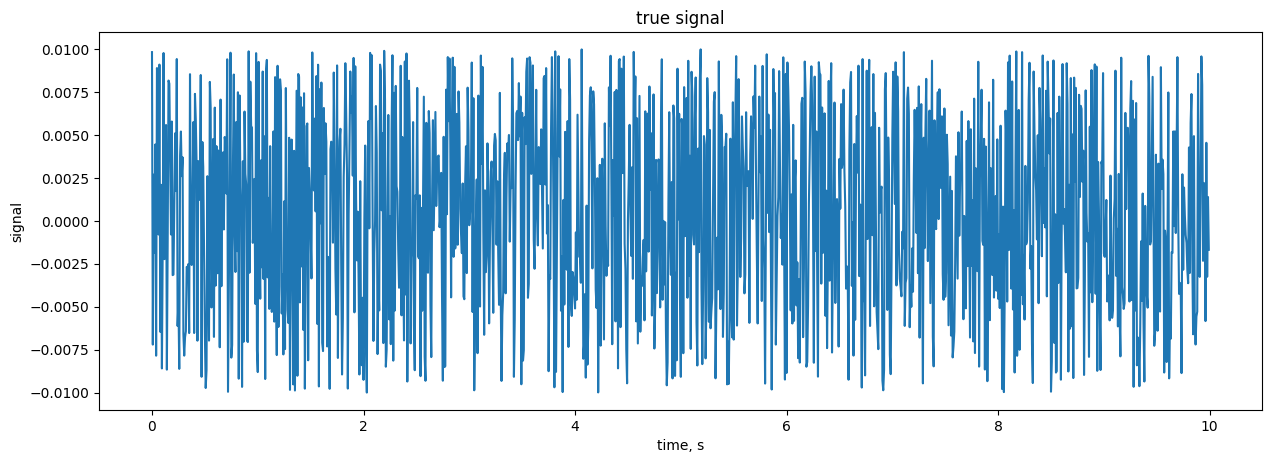

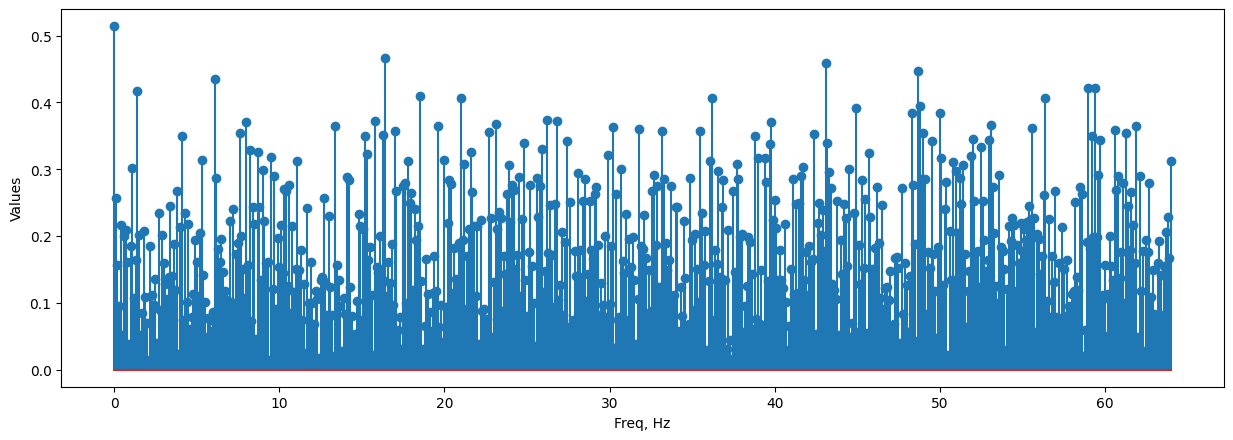

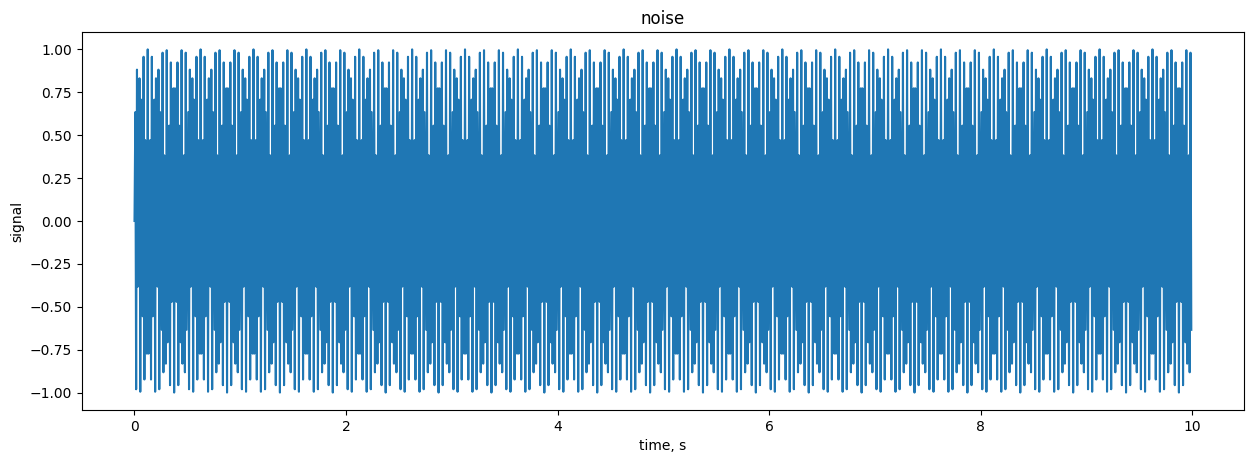

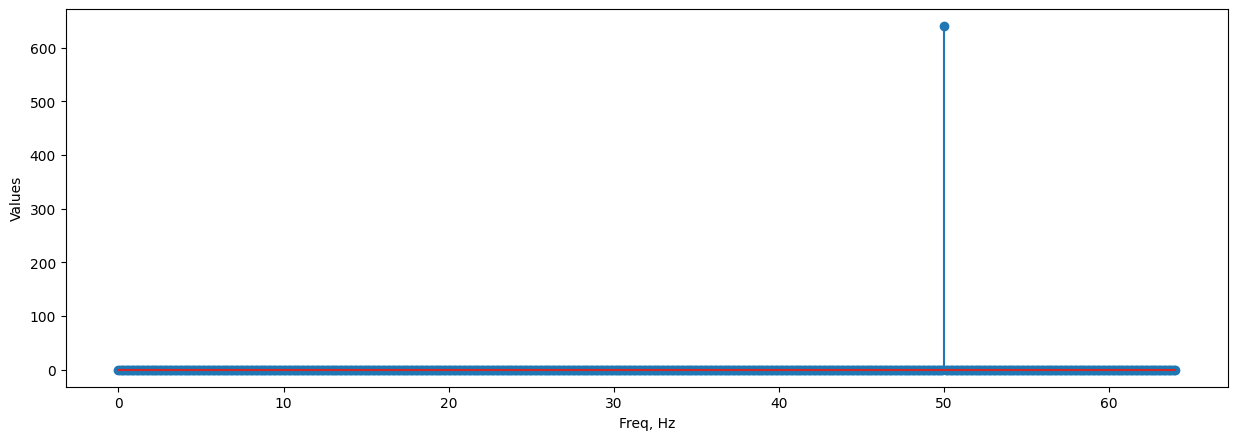

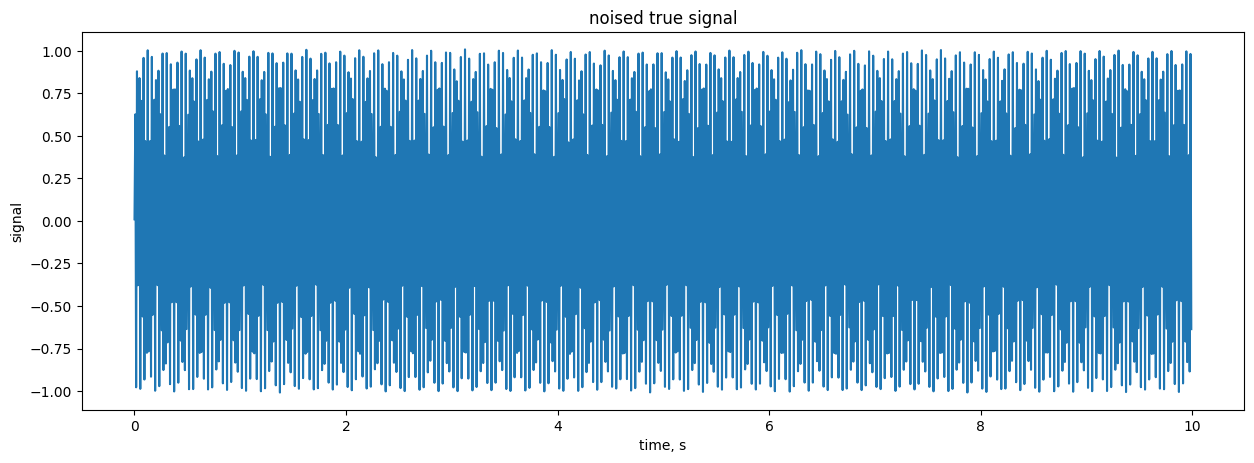

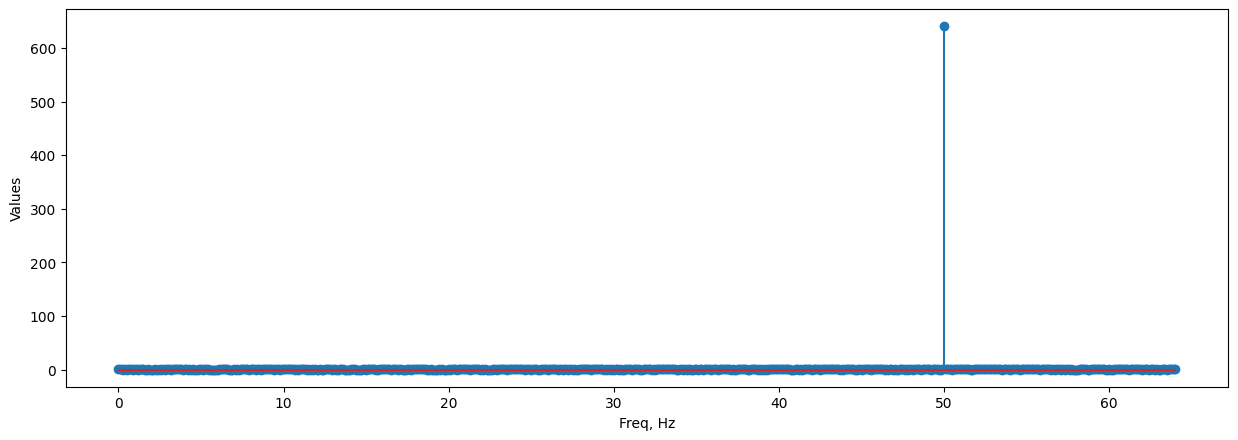

In [12]:
timestamps, network_noise = generate_sine_wave(50, 128, 10) # change here to 10 s

true_signal = generate_noise(0.01, len(network_noise))
true_and_noise = network_noise + true_signal

plot_sig(timestamps, true_signal, title="true signal")
plot_spectrum_stem(true_signal, sample_rate)

plot_sig(timestamps, network_noise, title="noise")
plot_spectrum_stem(network_noise, sample_rate)

plot_sig(timestamps, true_and_noise, title="noised true signal")
plot_spectrum_stem(true_and_noise, sample_rate)


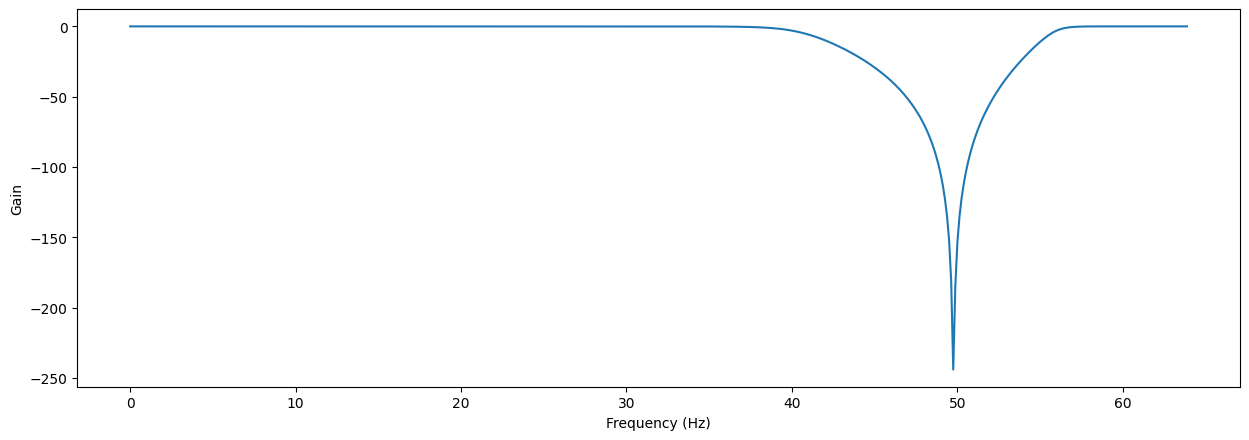

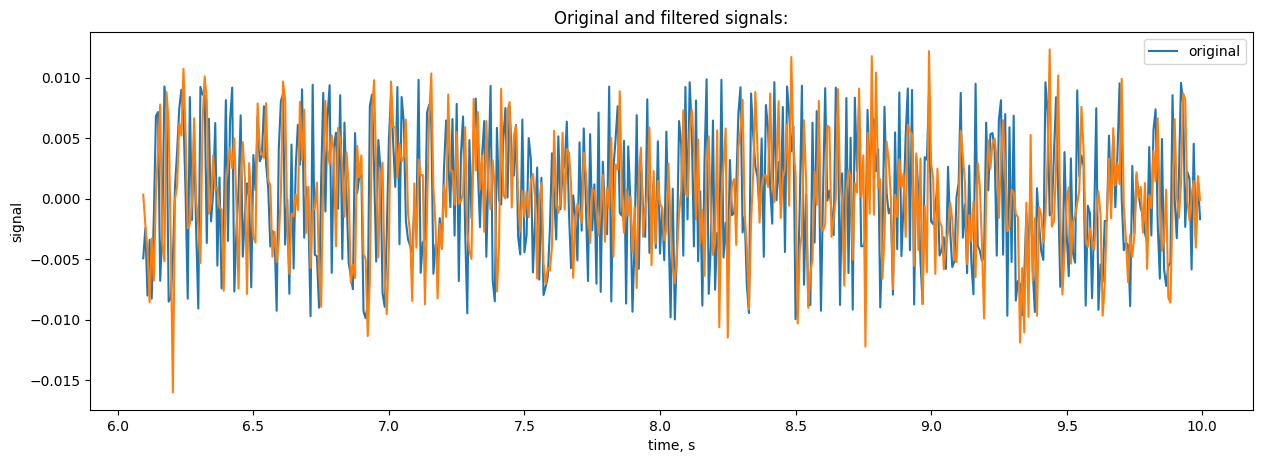

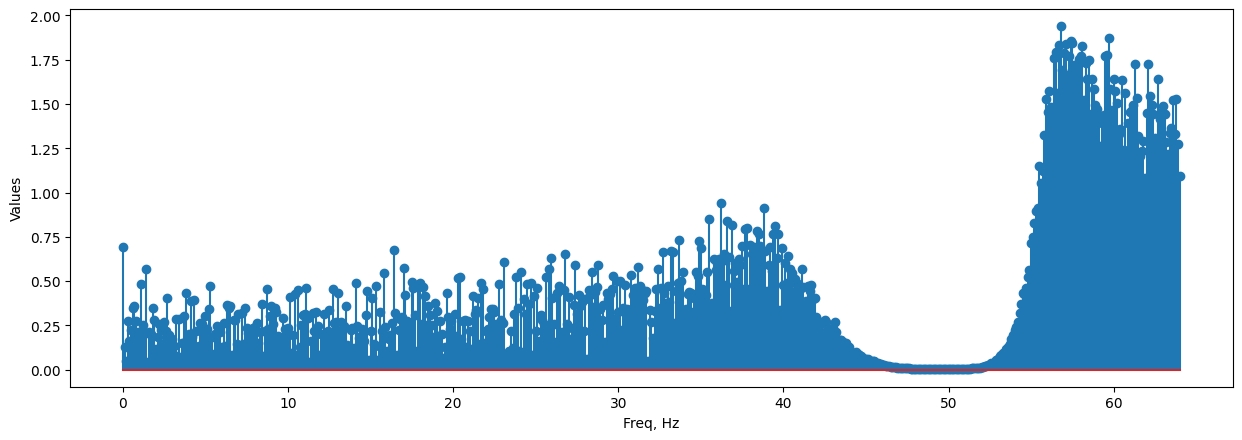

In [13]:
b, a = signal.butter(N=5, Wn=[40, 56], btype='bandstop', fs=sample_rate)
filtered = signal.lfilter(b, a, true_and_noise)

w, h = signal.freqz(b, a)
plt.plot(0.5*sample_rate*w/np.pi, 20*np.log10(np.abs(h)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.show()

n = 500
plt.plot(timestamps[-n:], true_signal[-n:], label="original")

plt.legend()
plot_sig(timestamps[-n:], filtered[-n:], title="Original and filtered signals:")

plot_spectrum_stem(filtered, sample_rate)


### Task 4

In [14]:
import sounddevice as sd
from scipy.io.wavfile import write, read

fs = 44000
seconds = 3

my_recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()

write('./44k.wav', fs, my_recording)

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write, read

fs = 8000
seconds = 3

my_recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()

write('./8k.wav', fs, my_recording)

In [15]:
import winsound

filename = '8k.wav'
winsound.PlaySound(filename, winsound.SND_FILENAME)

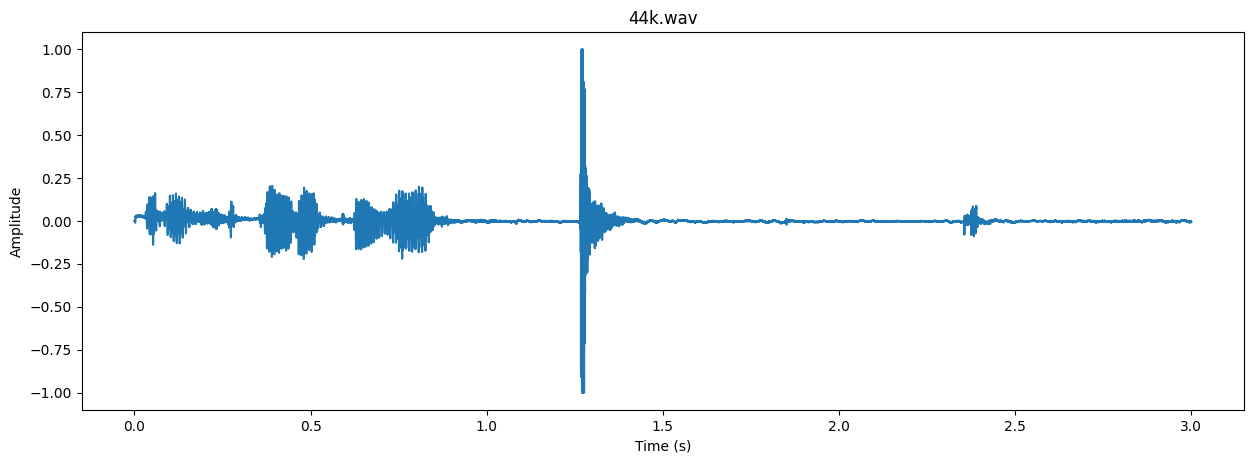

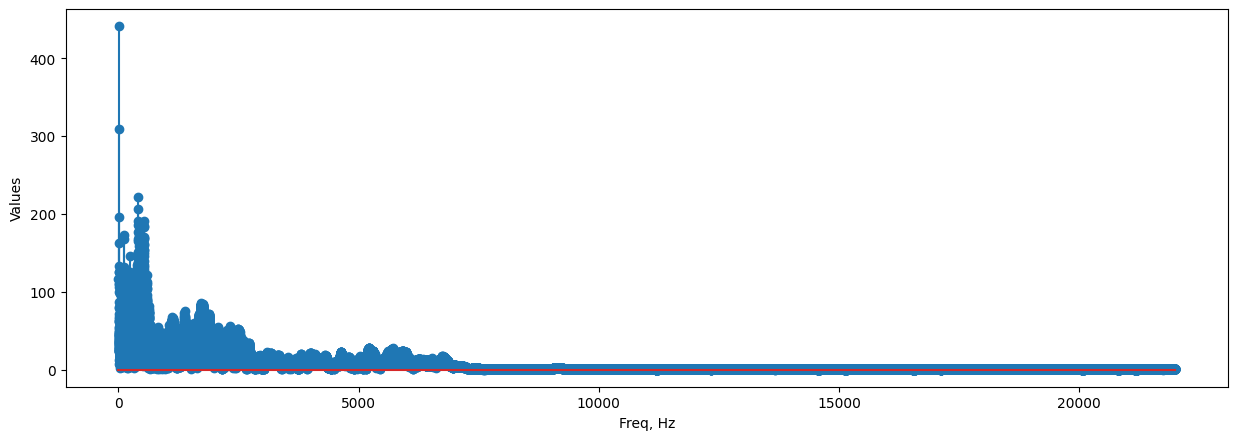

In [ ]:
path = "44k.wav"
ipt_data = read(path)
data = ipt_data[1][:, 0]
sample_rate = 44000
duration = len(data) / 44000
timestamps = np.linspace(0, len(data) / ipt_data[0], num = len(data))

plt.plot(timestamps, data)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title(path)
plt.show()
plot_spectrum_stem(data, sample_rate)

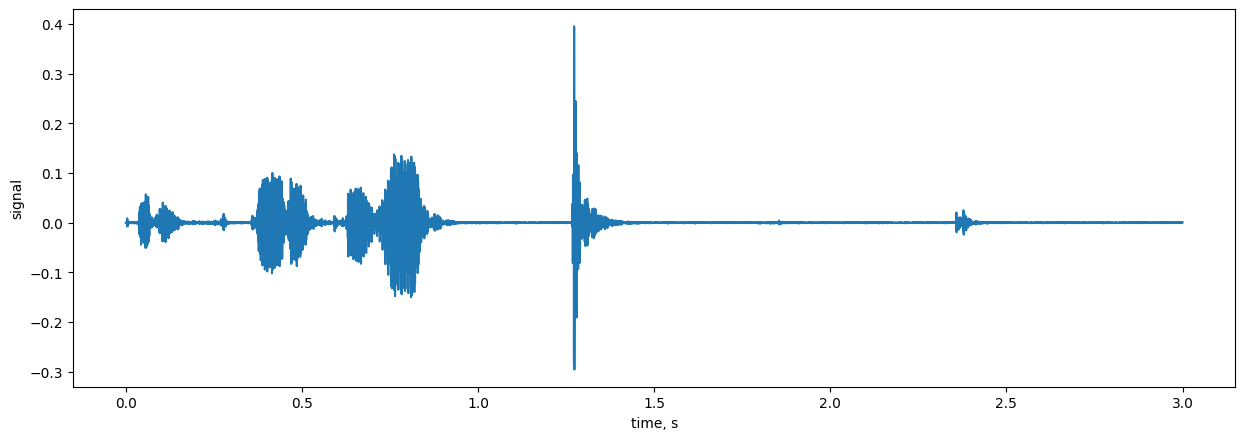

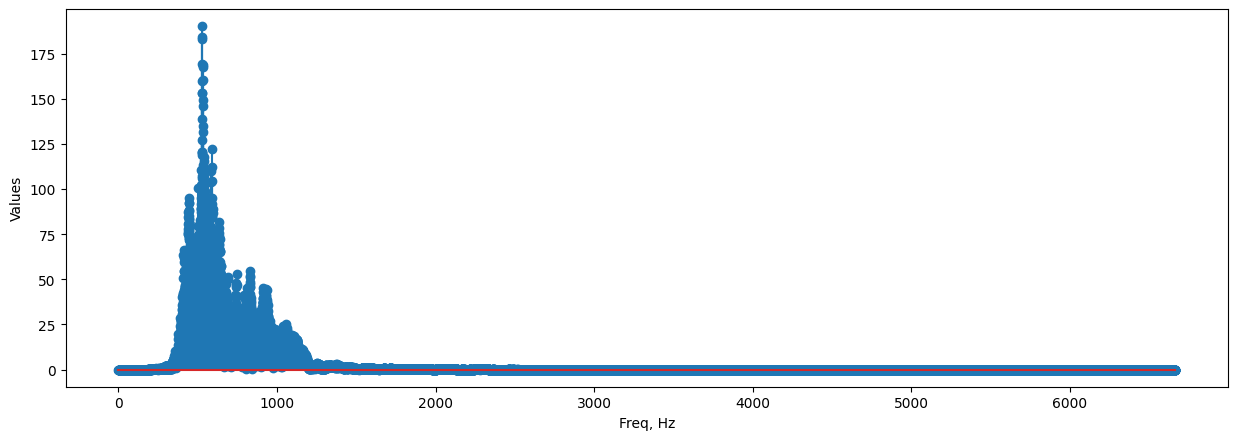

In [225]:
from scipy.io import wavfile

b, a = signal.butter(N=5, Wn=[450, 1000], btype='bandpass', fs=sample_rate)

y8 = signal.lfilter(b, a, data)

plot_sig(timestamps, y8)
plot_spectrum_stem(y8, sample_rate, upper=20000)

wavfile.write('./44k_mid.wav', 44000, y8)

In [227]:
import winsound

filename = '44k_mid.wav'
winsound.PlaySound(filename, winsound.SND_FILENAME)

#### на низьких частотах (до 450 гц) чути басовитий голос, і майже не чути високочастоткого хлопка. Частоти 450+ Гц містять розбірливі, але дуже неприродні звуки без низьких частот